# Projeto de detecção de imagens - weapon detection

Neste projeto, faremos a detecção de objetos (armas de fogo) em imagens com o uso das técnicas (modelo) YOLO (You Only Look Once) que consiste na utilização de Redes Neurais Convolucionais da área de Deep Learning (redes neurais profundas) com a versão YOLOv8 da Ultralytics.
Obs. Este projeto foi realizado a partir de uma adaptação de projetos do curso "Detecção de Objetos com YOLO, Darknet, OpenCV e Python"  da IA Expert Academy - https://iaexpert.academy/.

O objetivo do projeto é fazer a deteccção personalizada de algumas armas de fogo em imagens. Para tanto foram escolhidas as classes alvo: Handgun, Shotgun e Rifle.

O nosso conjunto de imagens customizado para fazer o treinamento e a validação  com o YOLO será obtido junto ao repositório Open Images Dataset V7 (https://storage.googleapis.com/openimages/web/index.html)

Para facilitar a obtenção das imagens será utilizada a ferramenta [OIDv4 Toolkit](https://github.com/EscVM/OIDv4_ToolKit).


In [2]:
# buscaremos a ferramenta por meio de clonagem junto ao repositório do Github
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (422/422), 34.08 MiB | 34.90 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [5]:
ls

imagens_teste/  OIDv4_ToolKit/  sample_data/


acessar o diretório da ferramenta OIDv4_ToolKit

In [7]:
cd OIDv4_ToolKit/

/content/OIDv4_ToolKit


In [9]:
ls


classes.txt  images/  LICENSE  main.py  modules/  README.md  requirements.txt


In [10]:
# instalando as bibliotecas requeridas no arquivo requiriments.txt
!pip3 install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.9 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


Após a instalação da ferramenta OIDv4_ToolKit faremos o download das imagens de treinamento.

In [11]:
# executando o arquivo main.py para baixar as imagens de treinamento
!python main.py downloader --classes Handgun Shotgun Rifle --type_csv train --limit 500 --multiclasses 1


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading ['Handgun', 'Shotgun', 'Rifle'] together.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 67240 KB/s, 0 

Download das imagens de validação.

In [12]:
# executando o arquivo main.py para baixar as imagens de validação
!python main.py downloader --classes Handgun Shotgun Rifle --type_csv test --limit 100 --multiclasses 1


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading ['Handgun', 'Shotgun', 'Rifle'] together.
   [ERROR] | Missing the test-annotations-bbox.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...100%, 49 MB, 39785 KB/s, 1 seco

É necessária a alteração do arquivo classes.txt, originalmente obtido com a instalação da ferramenta OIDv4_ToolKit, para inclusão dos nomes das classes do projeto (Handgun, Shotgun e Rifle).

In [13]:
#alterando o nome das classes
!echo -e 'Handgun\nShotgun\nRifle' > classes.txt

In [14]:
!cat classes.txt

Handgun
Shotgun
Rifle


Por questões de compatibilidade na anotação das imagens baixadas do repositório Open Images Dataset V7, será necessária a execução de um script anexo, que converte os dados (posição das caixas delimitadoras) das imagens baixadas, já anotadas, para uma versão compatível com a biblioteca YOLO. (O arquivo converter_annotations foi obtido junto ao material do curso "Detecção de Objetos com YOLO, Darknet, OpenCV e Python" (IA Expert Academy). O referido arquivo deverá ser alocado dentro do diretório da ferrameta OIDv4.

In [15]:
ls

classes.txt               images/  main.py   OID/       requirements.txt
converter_annotations.py  LICENSE  modules/  README.md


In [16]:
#executando o arquivo de conversão das anotações
!python converter_annotations.py

Subdiretorio atual: test
Convertendo os annotations para a classe:  Handgun_Shotgun_Rifle
100% 192/192 [00:03<00:00, 52.33it/s]
Subdiretorio atual: train
Convertendo os annotations para a classe:  Handgun_Shotgun_Rifle
100% 1324/1324 [00:29<00:00, 44.85it/s]


**Após a conversão dos arquivos de anotação é necessaria a criação de uma pasta dataset no local: '/content/dataset/' bem como mover os arquivos de treinamento e teste para as subpastas a serem criadas com os nomes: train e valid.**

Nesse momento as pastas acima mencionadas deverão apresentar a seguinte estrutura:
* /dataset
  * /train
  * /valid

In [17]:
# por ocasião do treinamento faremos o uso de GPU cuja utilização deve estar assinalada na configuração do notebook.
!nvidia-smi

Tue Jan 23 17:49:24 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Download da ferramenta ultralytics

In [18]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 702.8/702.8 kB 4.2 MB/s eta 0:00:00


In [19]:
# importando as demais bibliotecas para uso no projeto
from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt

In [20]:
cd ..

/content


Criando o arquivo de configurações requerido pela biblioteca

In [21]:
!touch configs_modelo.yaml

In [22]:
%%writefile configs_modelo.yaml
path: '/content/dataset/'
train: 'train/'
val: 'valid/'
test: # opcional

nc: 3
names: ['Handgun', 'Shotgun', 'Rifle']

Overwriting configs_modelo.yaml


criando uma variável com o caminho do arquivo de configurações


In [23]:
diretorio_raiz = '/content/'
arquivo_config = os.path.join(diretorio_raiz, 'configs_modelo.yaml')

In [24]:
arquivo_config

'/content/configs_modelo.yaml'

Gerando o modelo na versão small

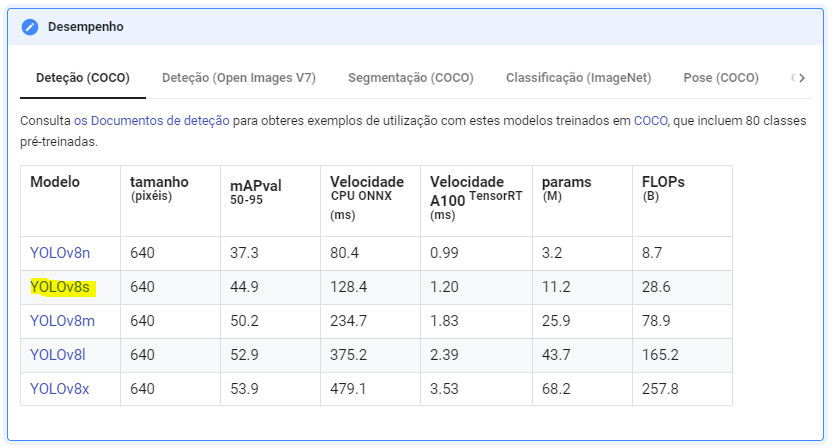


In [25]:
model = YOLO('yolov8s.yaml')

In [ ]:
ls

configs_modelo.yaml  dataset/  OIDv4_ToolKit/  runs/  sample_data/


In [26]:
cd dataset/

/content/dataset


Iniciando o treinamento com 300 épocas

In [27]:
resultados = model.train(data=arquivo_config, epochs=300, imgsz=640, name='yolov8s_modelo')

Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/configs_modelo.yaml, epochs=300, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8s_modelo, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

100%|██████████| 755k/755k [00:00<00:00, 18.3MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 84.4MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/train... 1324 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1324/1324 [00:00<00:00, 2009.66it/s]

train: New cache created: /content/dataset/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/dataset/valid... 192 images, 0 backgrounds, 0 corrupt: 100%|██████████| 192/192 [00:00<00:00, 1058.33it/s]

val: New cache created: /content/dataset/valid.cache


Plotting labels to runs/detect/yolov8s_modelo/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8s_modelo
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      4.09G      3.248      4.041      4.087         41        640: 100%|██████████| 83/83 [00:46<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.34it/s]

                   all        192        301    0.00812      0.684     0.0201    0.00639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      4.34G      2.793      3.693      3.428         41        640: 100%|██████████| 83/83 [00:41<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.52it/s]

                   all        192        301     0.0505       0.21      0.054     0.0146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      4.13G      2.569        3.6      3.111         53        640: 100%|██████████| 83/83 [00:41<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.43it/s]

                   all        192        301     0.0228       0.19      0.017    0.00429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      4.15G      2.413      3.494      2.938         40        640: 100%|██████████| 83/83 [00:43<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        192        301     0.0102      0.112      0.018    0.00452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      4.15G       2.32        3.4      2.799         45        640: 100%|██████████| 83/83 [00:42<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.19it/s]

                   all        192        301     0.0577      0.234     0.0702     0.0228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      4.19G      2.219      3.312      2.706         41        640: 100%|██████████| 83/83 [00:42<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.69it/s]

                   all        192        301       0.39      0.217     0.0719     0.0229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      4.19G      2.159      3.204      2.617         37        640: 100%|██████████| 83/83 [00:42<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.80it/s]

                   all        192        301      0.105     0.0831      0.086     0.0291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      4.18G      2.112      3.141      2.594         41        640: 100%|██████████| 83/83 [00:42<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.84it/s]

                   all        192        301      0.124      0.161        0.1     0.0363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      4.15G      2.014      3.055      2.506         35        640: 100%|██████████| 83/83 [00:42<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.66it/s]

                   all        192        301       0.15      0.433       0.18     0.0674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      4.14G      1.996      2.996      2.481         47        640: 100%|██████████| 83/83 [00:42<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.64it/s]

                   all        192        301      0.115      0.278      0.178       0.07



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      4.17G      1.964       2.98      2.426         55        640: 100%|██████████| 83/83 [00:42<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.94it/s]

                   all        192        301       0.19      0.378      0.284       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      4.18G      1.887      2.896      2.386         51        640: 100%|██████████| 83/83 [00:42<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.56it/s]

                   all        192        301      0.273      0.429      0.247      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      4.14G      1.873      2.838       2.34         36        640: 100%|██████████| 83/83 [00:42<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.45it/s]

                   all        192        301       0.21       0.27      0.201     0.0839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      4.17G      1.851      2.839      2.341         65        640: 100%|██████████| 83/83 [00:42<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all        192        301      0.174      0.278      0.158     0.0638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      4.17G      1.852      2.774      2.315         36        640: 100%|██████████| 83/83 [00:42<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.22it/s]

                   all        192        301      0.257      0.305      0.223     0.0929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      4.18G      1.794      2.725      2.258         52        640: 100%|██████████| 83/83 [00:41<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.91it/s]

                   all        192        301      0.247      0.469        0.3      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      4.15G      1.799       2.66      2.263         59        640: 100%|██████████| 83/83 [00:40<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.44it/s]

                   all        192        301      0.182      0.499      0.266      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      4.19G       1.75      2.639      2.217         44        640: 100%|██████████| 83/83 [00:40<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.56it/s]

                   all        192        301       0.27      0.319      0.293      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      4.16G      1.755      2.664      2.213         50        640: 100%|██████████| 83/83 [00:40<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all        192        301      0.339      0.477      0.372      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      4.35G      1.717      2.601      2.191         52        640: 100%|██████████| 83/83 [00:41<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]

                   all        192        301      0.263      0.441       0.29      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      4.31G       1.69      2.566      2.166         38        640: 100%|██████████| 83/83 [00:41<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.90it/s]

                   all        192        301      0.297      0.324      0.311       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      4.16G       1.68      2.532      2.146         60        640: 100%|██████████| 83/83 [00:41<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.40it/s]

                   all        192        301      0.282      0.616      0.352       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      4.16G      1.678      2.506      2.104         53        640: 100%|██████████| 83/83 [00:40<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]

                   all        192        301      0.326      0.442        0.4      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300      4.15G      1.661      2.484      2.113         64        640: 100%|██████████| 83/83 [00:41<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.97it/s]

                   all        192        301      0.374      0.417      0.376      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      4.13G      1.648      2.468      2.103         39        640: 100%|██████████| 83/83 [00:41<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.25it/s]

                   all        192        301      0.264      0.468      0.358      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      4.18G      1.627       2.49      2.092         58        640: 100%|██████████| 83/83 [00:41<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all        192        301      0.296      0.489       0.38      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      4.16G      1.617      2.419      2.063         53        640: 100%|██████████| 83/83 [00:40<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.18it/s]

                   all        192        301      0.345      0.451      0.388      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      4.15G      1.607      2.377      2.053         42        640: 100%|██████████| 83/83 [00:40<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.54it/s]

                   all        192        301      0.298      0.441      0.344       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      4.14G      1.622      2.422      2.046         60        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.41it/s]

                   all        192        301      0.345      0.535      0.424      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      4.16G      1.595      2.353      2.049         43        640: 100%|██████████| 83/83 [00:40<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.12it/s]

                   all        192        301      0.385      0.531      0.481      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      4.16G      1.566       2.33      2.019         43        640: 100%|██████████| 83/83 [00:40<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.84it/s]

                   all        192        301      0.396      0.394      0.353      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      4.31G      1.558      2.321      2.016         42        640: 100%|██████████| 83/83 [00:41<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all        192        301      0.361      0.504      0.422       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      4.34G      1.565      2.295      2.007         44        640: 100%|██████████| 83/83 [00:40<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        192        301      0.315      0.523       0.41      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      4.16G      1.533       2.26      1.978         48        640: 100%|██████████| 83/83 [00:40<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]

                   all        192        301      0.373      0.561      0.457      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      4.16G      1.501      2.203      1.941         29        640: 100%|██████████| 83/83 [00:40<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        192        301      0.326      0.591      0.434      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      4.16G      1.527      2.246      1.969         69        640: 100%|██████████| 83/83 [00:41<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all        192        301      0.386      0.512      0.465       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      4.13G      1.499      2.218      1.944         38        640: 100%|██████████| 83/83 [00:41<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        192        301      0.371      0.551      0.443      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      4.18G      1.518      2.228      1.961         49        640: 100%|██████████| 83/83 [00:41<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]

                   all        192        301       0.39      0.418      0.403      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      4.16G      1.516      2.224      1.943         37        640: 100%|██████████| 83/83 [00:40<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.37it/s]

                   all        192        301      0.395      0.576      0.457      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      4.18G      1.466      2.148      1.911         34        640: 100%|██████████| 83/83 [00:40<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.81it/s]

                   all        192        301      0.331      0.504      0.405      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300      4.14G      1.482      2.196      1.928         53        640: 100%|██████████| 83/83 [00:40<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.89it/s]

                   all        192        301      0.352      0.494      0.382        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      4.14G      1.491      2.164      1.915         54        640: 100%|██████████| 83/83 [00:41<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all        192        301      0.387      0.493      0.458      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      4.19G      1.477       2.16      1.911         51        640: 100%|██████████| 83/83 [00:41<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all        192        301      0.429      0.545      0.497      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300      4.34G      1.465      2.136      1.907         55        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.94it/s]

                   all        192        301      0.412      0.565       0.51      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      4.14G      1.449      2.082      1.893         34        640: 100%|██████████| 83/83 [00:39<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        192        301      0.387      0.588      0.445      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      4.18G      1.445      2.087      1.895         61        640: 100%|██████████| 83/83 [00:39<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.52it/s]

                   all        192        301       0.38      0.513       0.47      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      4.18G      1.441      2.072      1.868         31        640: 100%|██████████| 83/83 [00:39<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all        192        301      0.429      0.579      0.506        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300      4.32G      1.437      2.102      1.864         46        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.18it/s]

                   all        192        301      0.421      0.614      0.502      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      4.36G      1.434      2.041      1.853         51        640: 100%|██████████| 83/83 [00:39<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.20it/s]

                   all        192        301      0.442      0.586      0.494       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300      4.31G      1.417       2.06      1.863         50        640: 100%|██████████| 83/83 [00:40<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.59it/s]

                   all        192        301      0.427      0.559      0.502        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      4.31G      1.415      2.018       1.85         31        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.12it/s]

                   all        192        301       0.38      0.528      0.471      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      4.31G      1.389      1.993      1.837         33        640: 100%|██████████| 83/83 [00:40<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.00it/s]

                   all        192        301      0.357      0.582      0.506      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300       4.3G      1.365      1.956      1.814         36        640: 100%|██████████| 83/83 [00:39<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.11it/s]

                   all        192        301      0.466      0.625      0.516      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300      4.32G      1.389      1.982       1.83         37        640: 100%|██████████| 83/83 [00:40<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.54it/s]

                   all        192        301      0.358      0.479      0.424      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300      4.18G      1.386      1.971      1.833         53        640: 100%|██████████| 83/83 [00:39<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        192        301      0.461      0.485      0.514      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300      4.16G       1.36      1.973      1.811         28        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.12it/s]

                   all        192        301      0.428      0.548      0.498      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300      4.14G       1.36      1.954        1.8         44        640: 100%|██████████| 83/83 [00:39<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.44it/s]

                   all        192        301      0.403      0.526      0.452      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300      4.16G      1.345      1.992      1.802         43        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.22it/s]

                   all        192        301       0.45      0.594      0.529      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      4.21G      1.378       1.98      1.828         48        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.11it/s]

                   all        192        301      0.439      0.545      0.498      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300      4.32G      1.365      1.905      1.791         42        640: 100%|██████████| 83/83 [00:39<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.65it/s]

                   all        192        301      0.473      0.539      0.506      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300      4.14G      1.331      1.936      1.775         62        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.68it/s]

                   all        192        301      0.455      0.557      0.537      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300      4.16G       1.33      1.943       1.77         33        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]

                   all        192        301      0.463      0.549        0.5      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300      4.15G      1.292      1.873      1.737         54        640: 100%|██████████| 83/83 [00:39<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.61it/s]

                   all        192        301      0.421      0.624      0.543      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300      4.29G      1.331      1.923      1.778         43        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.93it/s]

                   all        192        301      0.457      0.569      0.525      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300      4.31G      1.314      1.874      1.763         38        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all        192        301      0.444      0.579      0.516      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300      4.33G      1.321      1.869      1.769         51        640: 100%|██████████| 83/83 [00:40<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.57it/s]

                   all        192        301      0.457      0.608      0.559       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300      4.32G      1.302       1.86      1.745         37        640: 100%|██████████| 83/83 [00:39<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.85it/s]

                   all        192        301       0.48      0.592      0.534      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300      4.33G      1.326      1.856      1.765         34        640: 100%|██████████| 83/83 [00:40<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.18it/s]

                   all        192        301      0.491      0.596      0.517      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300       4.3G      1.319      1.841      1.752         45        640: 100%|██████████| 83/83 [00:40<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.77it/s]

                   all        192        301      0.451        0.6      0.521      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300      4.34G      1.316      1.813      1.742         45        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        192        301      0.479       0.55      0.488      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300      4.33G      1.304      1.829      1.733         50        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.05it/s]

                   all        192        301      0.442      0.539      0.479      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300      4.31G      1.295      1.826      1.728         48        640: 100%|██████████| 83/83 [00:40<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.50it/s]

                   all        192        301      0.449      0.632      0.539      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300      4.28G      1.257      1.764      1.685         35        640: 100%|██████████| 83/83 [00:40<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.19it/s]

                   all        192        301      0.487      0.546      0.535      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300      4.16G      1.304      1.826      1.736         40        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all        192        301      0.464      0.565      0.525      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300      4.16G      1.278      1.789      1.704         38        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.63it/s]

                   all        192        301       0.43      0.538      0.509      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300      4.18G      1.263      1.806      1.692         62        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]

                   all        192        301      0.504      0.597       0.54       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300      4.14G      1.281      1.802       1.72         35        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.74it/s]

                   all        192        301        0.5      0.611       0.55      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300      4.14G      1.257      1.735      1.688         38        640: 100%|██████████| 83/83 [00:39<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.23it/s]

                   all        192        301      0.409      0.553      0.527      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300      4.16G       1.27      1.774      1.709         51        640: 100%|██████████| 83/83 [00:39<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  2.00it/s]

                   all        192        301      0.469      0.613      0.531      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300      4.17G      1.245      1.757      1.689         42        640: 100%|██████████| 83/83 [00:39<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.61it/s]

                   all        192        301      0.458      0.559      0.513      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300      4.31G      1.257      1.758      1.696         33        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.17it/s]

                   all        192        301      0.398      0.506      0.436      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300      4.16G      1.251       1.72      1.681         49        640: 100%|██████████| 83/83 [00:39<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.96it/s]

                   all        192        301      0.507      0.623      0.593      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300      4.18G      1.226      1.713      1.649         54        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]

                   all        192        301      0.428       0.56      0.492      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300      4.15G      1.243      1.713      1.676         45        640: 100%|██████████| 83/83 [00:40<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.57it/s]

                   all        192        301      0.487      0.622      0.563      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300      4.31G      1.224      1.676      1.652         47        640: 100%|██████████| 83/83 [00:39<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.88it/s]

                   all        192        301      0.516       0.63      0.581       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300      4.16G      1.219      1.681      1.649         41        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        192        301       0.49      0.583      0.557      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300      4.16G      1.213      1.715      1.648         54        640: 100%|██████████| 83/83 [00:40<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        192        301       0.42      0.568      0.475      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300      4.32G      1.199      1.664      1.641         50        640: 100%|██████████| 83/83 [00:40<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        192        301      0.477      0.619      0.558      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300      4.18G      1.195      1.661      1.633         49        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.85it/s]

                   all        192        301      0.478      0.617      0.528      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300      4.16G      1.215      1.673      1.646         43        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all        192        301      0.482      0.627      0.557      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300      4.16G      1.173      1.616      1.624         61        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.33it/s]

                   all        192        301        0.5      0.611      0.568       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300      4.31G      1.204      1.674      1.645         53        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.05it/s]

                   all        192        301       0.46      0.617      0.563      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300      4.31G      1.177      1.658      1.625         46        640: 100%|██████████| 83/83 [00:40<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.27it/s]

                   all        192        301      0.445      0.627      0.532      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300      4.19G      1.178      1.637      1.612         40        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.15it/s]

                   all        192        301      0.523      0.606      0.574      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300      4.21G      1.191      1.626      1.627         34        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.56it/s]

                   all        192        301       0.51      0.621      0.551      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300      4.16G      1.156      1.587      1.603         49        640: 100%|██████████| 83/83 [00:39<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]

                   all        192        301      0.507      0.685      0.564      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300      4.33G       1.18      1.611      1.623         45        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.11it/s]

                   all        192        301      0.467        0.6       0.53      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300      4.16G      1.153      1.567       1.59         61        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.56it/s]

                   all        192        301       0.47      0.581      0.534      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300      4.15G       1.17      1.569      1.601         57        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.97it/s]

                   all        192        301      0.543      0.644      0.596      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300      4.34G      1.163      1.589      1.606         32        640: 100%|██████████| 83/83 [00:40<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.81it/s]

                   all        192        301      0.552      0.562      0.571      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300      4.15G      1.132      1.541      1.584         31        640: 100%|██████████| 83/83 [00:40<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]

                   all        192        301      0.522      0.676      0.575      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300      4.18G      1.174      1.603      1.603         40        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.03it/s]

                   all        192        301      0.536      0.619      0.593      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300      4.16G      1.157      1.571      1.591         55        640: 100%|██████████| 83/83 [00:40<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.55it/s]

                   all        192        301      0.541      0.601      0.581      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300      4.16G      1.143      1.565      1.586         42        640: 100%|██████████| 83/83 [00:40<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.13it/s]

                   all        192        301      0.546      0.581      0.568      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300       4.3G      1.126      1.542      1.569         36        640: 100%|██████████| 83/83 [00:40<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.11it/s]

                   all        192        301      0.516      0.576      0.552      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300      4.34G       1.15      1.593      1.596         48        640: 100%|██████████| 83/83 [00:39<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        192        301      0.484      0.624      0.573      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300      4.16G      1.133      1.544      1.565         44        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]

                   all        192        301      0.532      0.606      0.583      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300      4.15G      1.126      1.523      1.566         36        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.89it/s]

                   all        192        301      0.583      0.579      0.597      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300      4.31G      1.133      1.524      1.576         48        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.52it/s]

                   all        192        301      0.502      0.564      0.564      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300      4.32G      1.131      1.531      1.563         57        640: 100%|██████████| 83/83 [00:39<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.78it/s]

                   all        192        301      0.515      0.632      0.583      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300      4.37G      1.094      1.496      1.538         42        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]

                   all        192        301      0.535      0.623      0.596        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/300      4.32G      1.119      1.503      1.553         55        640: 100%|██████████| 83/83 [00:39<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.23it/s]

                   all        192        301      0.517      0.565      0.554      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300      4.31G      1.088      1.466      1.532         43        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.81it/s]

                   all        192        301      0.518      0.681      0.594      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300      4.35G      1.099      1.455      1.537         47        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.06it/s]

                   all        192        301      0.531      0.619       0.59      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300      4.16G      1.103      1.492      1.554         42        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.58it/s]

                   all        192        301      0.556      0.598      0.609      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300       4.2G      1.088      1.465      1.541         57        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.96it/s]

                   all        192        301      0.548      0.561      0.577      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300      4.31G      1.103      1.452      1.543         61        640: 100%|██████████| 83/83 [00:39<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]

                   all        192        301      0.518      0.611      0.582      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/300      4.16G      1.078       1.45      1.522         46        640: 100%|██████████| 83/83 [00:38<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.48it/s]

                   all        192        301      0.553      0.588       0.59      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/300      4.16G      1.099      1.464      1.546         46        640: 100%|██████████| 83/83 [00:39<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]

                   all        192        301      0.504      0.601      0.556      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/300      4.16G      1.063      1.419      1.503         26        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.93it/s]

                   all        192        301      0.576      0.621      0.621      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/300      4.13G       1.05      1.406      1.504         56        640: 100%|██████████| 83/83 [00:40<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]

                   all        192        301      0.557      0.673      0.603      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/300      4.14G      1.065      1.443      1.522         41        640: 100%|██████████| 83/83 [00:39<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        192        301      0.534      0.613      0.593      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/300      4.14G      1.076      1.445      1.527         46        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.69it/s]

                   all        192        301       0.56      0.618      0.631      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/300      4.29G      1.059      1.416      1.502         36        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.17it/s]

                   all        192        301      0.549       0.58      0.589      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/300      4.18G      1.051      1.393      1.499         53        640: 100%|██████████| 83/83 [00:39<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]

                   all        192        301      0.552       0.57      0.605      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/300      4.16G      1.064      1.419      1.501         47        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.94it/s]

                   all        192        301      0.541       0.67      0.624      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/300      4.16G      1.076      1.397      1.516         54        640: 100%|██████████| 83/83 [00:40<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.18it/s]

                   all        192        301      0.524      0.672      0.597      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/300      4.31G      1.075      1.419      1.518         34        640: 100%|██████████| 83/83 [00:40<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.41it/s]

                   all        192        301      0.604      0.575      0.581      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/300      4.14G      1.054       1.41        1.5         47        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all        192        301       0.58      0.634      0.602      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/300      4.34G      1.074      1.395      1.518         55        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        192        301      0.545      0.634      0.617      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/300      4.34G      1.047      1.385      1.476         37        640: 100%|██████████| 83/83 [00:40<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.77it/s]

                   all        192        301      0.553       0.63      0.605      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/300      4.19G      1.054      1.385      1.488         33        640: 100%|██████████| 83/83 [00:40<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.01it/s]

                   all        192        301      0.516      0.623      0.573      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/300      4.31G      1.043      1.396      1.479         38        640: 100%|██████████| 83/83 [00:40<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.20it/s]

                   all        192        301      0.507      0.655      0.573      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/300      4.34G      1.033      1.388      1.482         45        640: 100%|██████████| 83/83 [00:40<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.87it/s]

                   all        192        301       0.54       0.63      0.592      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/300      4.16G      1.012      1.334      1.455         39        640: 100%|██████████| 83/83 [00:40<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.23it/s]

                   all        192        301      0.576      0.546      0.588      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/300      4.34G      1.031       1.37      1.488         55        640: 100%|██████████| 83/83 [00:40<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.74it/s]

                   all        192        301       0.49      0.626      0.568      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/300       4.3G      1.035      1.373      1.481         59        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all        192        301      0.532      0.599       0.59      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/300      4.19G      1.014      1.337      1.454         35        640: 100%|██████████| 83/83 [00:40<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.99it/s]

                   all        192        301      0.546        0.6      0.614      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300      4.21G      1.018      1.329      1.466         51        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.48it/s]

                   all        192        301       0.48      0.639      0.573      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300      4.34G       1.01      1.353      1.457         56        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]

                   all        192        301      0.523      0.595      0.593      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300      4.31G      1.006      1.316      1.446         55        640: 100%|██████████| 83/83 [00:40<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.12it/s]

                   all        192        301       0.52       0.61      0.575      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300      4.18G       1.01      1.324      1.457         50        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.11it/s]

                   all        192        301      0.582      0.566      0.583      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300      4.19G      1.002      1.307      1.443         50        640: 100%|██████████| 83/83 [00:40<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]

                   all        192        301      0.603      0.593      0.627      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300      4.32G      1.003      1.314      1.445         46        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        192        301      0.608      0.635      0.637      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300      4.33G      1.003      1.282      1.437         44        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.89it/s]

                   all        192        301      0.519      0.663      0.632      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300      4.32G      1.002        1.3      1.437         41        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.00it/s]

                   all        192        301      0.586      0.614      0.641      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300      4.16G      1.003      1.288       1.44         51        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all        192        301      0.557      0.623      0.616      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300      4.15G     0.9965      1.296      1.437         33        640: 100%|██████████| 83/83 [00:40<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.65it/s]

                   all        192        301      0.559      0.622      0.629      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300      4.31G      1.008      1.291      1.442         51        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.97it/s]

                   all        192        301      0.562      0.636      0.637      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/300      4.32G     0.9927      1.292      1.429         52        640: 100%|██████████| 83/83 [00:40<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.78it/s]

                   all        192        301      0.538      0.633      0.625      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/300      4.16G     0.9812      1.273      1.425         40        640: 100%|██████████| 83/83 [00:40<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.22it/s]

                   all        192        301      0.592      0.582      0.636      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/300      4.31G     0.9816      1.262      1.433         31        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.47it/s]

                   all        192        301      0.578      0.638      0.627      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/300       4.3G     0.9735      1.249      1.421         52        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]

                   all        192        301      0.635      0.602      0.661      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/300      4.32G     0.9726      1.253       1.41         53        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.93it/s]

                   all        192        301      0.523      0.637      0.606      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/300      4.38G     0.9739      1.228      1.406         46        640: 100%|██████████| 83/83 [00:39<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.87it/s]

                   all        192        301      0.569      0.678      0.633      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/300      4.33G       0.97      1.252      1.412         42        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.59it/s]

                   all        192        301      0.587      0.622      0.642      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/300      4.34G     0.9519      1.238        1.4         63        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.16it/s]

                   all        192        301      0.616      0.608      0.636      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/300      4.32G     0.9327      1.227      1.391         35        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.30it/s]

                   all        192        301      0.588       0.64      0.614      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/300      4.16G     0.9806       1.26       1.43         58        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.67it/s]

                   all        192        301      0.607      0.603      0.629      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/300       4.3G     0.9489       1.22      1.398         51        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all        192        301      0.577      0.601      0.623      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/300       4.3G     0.9882      1.246      1.418         37        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.92it/s]

                   all        192        301      0.597      0.588      0.611      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/300      4.32G     0.9664      1.251      1.418         37        640: 100%|██████████| 83/83 [00:40<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.16it/s]

                   all        192        301      0.585      0.641      0.632      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/300      4.34G     0.9571      1.217      1.408         45        640: 100%|██████████| 83/83 [00:40<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.19it/s]

                   all        192        301      0.606      0.629      0.602      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/300      4.31G     0.9321      1.186      1.381         52        640: 100%|██████████| 83/83 [00:40<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.50it/s]

                   all        192        301      0.585      0.605      0.613      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/300       4.3G     0.9417      1.207      1.395         29        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.93it/s]

                   all        192        301      0.577      0.651      0.613      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/300      4.16G     0.9571      1.209      1.404         54        640: 100%|██████████| 83/83 [00:40<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.01it/s]

                   all        192        301      0.516      0.643       0.61      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/300      4.35G     0.9191        1.2      1.376         47        640: 100%|██████████| 83/83 [00:41<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.23it/s]

                   all        192        301      0.549      0.634      0.618      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/300      4.34G     0.9198      1.159      1.369         42        640: 100%|██████████| 83/83 [00:40<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all        192        301      0.588      0.647       0.66      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/300       4.3G     0.9427      1.194      1.394         44        640: 100%|██████████| 83/83 [00:40<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.76it/s]

                   all        192        301      0.524      0.625      0.616      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/300      4.16G     0.9309      1.181      1.374         38        640: 100%|██████████| 83/83 [00:40<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.34it/s]

                   all        192        301      0.576      0.644      0.632      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/300      4.18G      0.929      1.184       1.38         38        640: 100%|██████████| 83/83 [00:40<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.84it/s]

                   all        192        301      0.556      0.664      0.633      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/300      4.15G     0.9207      1.169      1.378         62        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.97it/s]

                   all        192        301      0.568      0.625       0.63      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/300      4.34G     0.9043       1.16      1.365         31        640: 100%|██████████| 83/83 [00:39<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]

                   all        192        301      0.583      0.623      0.642      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/300      4.32G     0.9039      1.138      1.353         39        640: 100%|██████████| 83/83 [00:40<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.53it/s]

                   all        192        301      0.627      0.606      0.638      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/300      4.31G     0.9027      1.147      1.358         38        640: 100%|██████████| 83/83 [00:39<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all        192        301      0.587      0.616      0.616      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/300      4.31G     0.9047      1.139      1.362         56        640: 100%|██████████| 83/83 [00:40<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.20it/s]

                   all        192        301      0.593      0.599      0.622      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/300      4.17G     0.9163       1.15       1.36         43        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.95it/s]

                   all        192        301      0.616      0.562      0.621      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/300      4.16G     0.8954      1.107      1.338         42        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.90it/s]

                   all        192        301      0.571      0.641       0.64      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/300      4.18G     0.8969      1.117      1.338         59        640: 100%|██████████| 83/83 [00:39<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.66it/s]

                   all        192        301      0.641      0.633      0.666      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/300      4.31G     0.9186      1.153      1.367         48        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.27it/s]

                   all        192        301      0.612      0.616      0.644      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/300      4.31G      0.896      1.135      1.347         47        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.05it/s]

                   all        192        301      0.624      0.651      0.675      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/300      4.34G      0.884      1.131       1.34         54        640: 100%|██████████| 83/83 [00:39<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.97it/s]

                   all        192        301      0.588      0.645       0.65      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/300      4.31G     0.8833       1.12      1.339         53        640: 100%|██████████| 83/83 [00:40<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.60it/s]

                   all        192        301      0.651      0.636       0.67      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/300      4.32G     0.8991      1.148      1.357         52        640: 100%|██████████| 83/83 [00:40<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.15it/s]

                   all        192        301      0.603       0.58      0.633      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/300       4.3G     0.8973      1.135      1.345         46        640: 100%|██████████| 83/83 [00:40<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.13it/s]

                   all        192        301      0.625      0.573      0.635      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/300      4.18G      0.896      1.142      1.348         39        640: 100%|██████████| 83/83 [00:38<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.48it/s]

                   all        192        301      0.629      0.596      0.638      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/300      4.19G     0.8847      1.109       1.32         57        640: 100%|██████████| 83/83 [00:39<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.15it/s]

                   all        192        301      0.599      0.638      0.652       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/300      4.18G     0.8807      1.101      1.328         40        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]

                   all        192        301      0.584       0.59      0.636      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/300      4.14G     0.8753      1.099      1.324         49        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all        192        301      0.559      0.648      0.639      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/300      4.16G     0.8854      1.093      1.332         51        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.16it/s]

                   all        192        301      0.571      0.616      0.652      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/300      4.17G      0.892      1.109      1.336         31        640: 100%|██████████| 83/83 [00:39<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.79it/s]

                   all        192        301      0.644      0.589      0.649      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/300      4.16G     0.8607      1.081      1.323         54        640: 100%|██████████| 83/83 [00:39<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.01it/s]

                   all        192        301      0.588      0.572      0.628      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/300      4.17G     0.8663      1.086      1.327         43        640: 100%|██████████| 83/83 [00:40<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.19it/s]

                   all        192        301      0.596      0.627      0.662      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/300      4.16G     0.8659      1.066      1.312         51        640: 100%|██████████| 83/83 [00:39<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.45it/s]

                   all        192        301      0.594      0.599      0.616      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/300      4.22G     0.8699      1.083       1.32         43        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.01it/s]

                   all        192        301      0.587      0.653      0.654      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/300      4.16G     0.8433      1.077      1.313         56        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all        192        301      0.575      0.615      0.616      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/300      4.32G     0.8665       1.08      1.324         52        640: 100%|██████████| 83/83 [00:39<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.49it/s]

                   all        192        301      0.604      0.605       0.64      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/300      4.32G     0.8614      1.072      1.324         38        640: 100%|██████████| 83/83 [00:39<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]

                   all        192        301      0.585      0.648      0.639      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/300      4.32G     0.8578      1.068      1.318         41        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.20it/s]

                   all        192        301      0.657      0.614      0.649      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/300      4.31G     0.8506      1.061      1.306         52        640: 100%|██████████| 83/83 [00:39<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.58it/s]

                   all        192        301      0.596      0.618      0.654      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/300      4.28G     0.8381      1.052      1.297         35        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        192        301       0.64      0.597      0.647      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/300      4.15G     0.8656      1.048      1.313         62        640: 100%|██████████| 83/83 [00:39<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.17it/s]

                   all        192        301      0.676       0.57      0.655      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/300      4.18G     0.8512      1.046      1.306         49        640: 100%|██████████| 83/83 [00:39<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.50it/s]

                   all        192        301      0.707      0.565      0.668      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/300      4.15G     0.8495      1.032      1.297         42        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all        192        301      0.679      0.585      0.646      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/300      4.31G     0.8243      1.022       1.29         47        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.15it/s]

                   all        192        301      0.711       0.55      0.654      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/300      4.19G     0.8408      1.029      1.298         48        640: 100%|██████████| 83/83 [00:40<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.85it/s]

                   all        192        301      0.698      0.527      0.631      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/300      4.16G     0.8444      1.032      1.302         40        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.30it/s]

                   all        192        301      0.574      0.608      0.638      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/300      4.19G     0.8283      1.022       1.29         52        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        192        301       0.68      0.539      0.647      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/300      4.15G     0.8262       1.03       1.28         37        640: 100%|██████████| 83/83 [00:40<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]

                   all        192        301      0.691      0.556      0.651      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/300      4.18G     0.8451      1.037      1.301         48        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all        192        301      0.681      0.546      0.642      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/300      4.16G     0.8437      1.032      1.305         39        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.47it/s]

                   all        192        301      0.652      0.607      0.649      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/300      4.32G     0.8316          1       1.28         40        640: 100%|██████████| 83/83 [00:40<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.13it/s]

                   all        192        301      0.638      0.602       0.65      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/300      4.31G     0.8282      1.021      1.291         40        640: 100%|██████████| 83/83 [00:40<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.95it/s]

                   all        192        301      0.643      0.602      0.636      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/300      4.21G     0.8267      1.026       1.28         49        640: 100%|██████████| 83/83 [00:39<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.58it/s]

                   all        192        301      0.643      0.628       0.65      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/300      4.18G     0.8228      1.018      1.277         55        640: 100%|██████████| 83/83 [00:40<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.25it/s]

                   all        192        301      0.675      0.598      0.657      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/300      4.15G     0.8225     0.9912      1.283         51        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.91it/s]

                   all        192        301      0.658      0.597      0.649      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/300      4.15G     0.8208      0.983      1.276         45        640: 100%|██████████| 83/83 [00:40<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]

                   all        192        301      0.651      0.564      0.639      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/300      4.19G     0.8167     0.9958       1.28         52        640: 100%|██████████| 83/83 [00:40<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]

                   all        192        301      0.648      0.571      0.639      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/300      4.21G      0.804     0.9812      1.269         40        640: 100%|██████████| 83/83 [00:40<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.56it/s]

                   all        192        301      0.577      0.637      0.639       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/300      4.18G     0.8033     0.9596       1.27         74        640: 100%|██████████| 83/83 [00:40<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.84it/s]

                   all        192        301      0.593      0.632      0.622      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/300      4.18G     0.7995     0.9769       1.27         44        640: 100%|██████████| 83/83 [00:40<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.52it/s]

                   all        192        301      0.571      0.623      0.632      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/300      4.16G     0.7984     0.9854      1.268         38        640: 100%|██████████| 83/83 [00:40<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.85it/s]

                   all        192        301      0.642      0.581      0.636      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/300      4.16G      0.818      1.003      1.277         39        640: 100%|██████████| 83/83 [00:41<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.68it/s]

                   all        192        301      0.612      0.614      0.648      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/300      4.32G     0.8123     0.9829      1.277         36        640: 100%|██████████| 83/83 [00:41<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.85it/s]

                   all        192        301      0.641       0.59      0.625      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/300      4.15G     0.8123     0.9568      1.261         45        640: 100%|██████████| 83/83 [00:41<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        192        301      0.608      0.593      0.633      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/300      4.18G     0.8194     0.9817      1.272         36        640: 100%|██████████| 83/83 [00:42<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]

                   all        192        301      0.644      0.565      0.625      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/300      4.16G      0.791      0.963       1.26         52        640: 100%|██████████| 83/83 [00:41<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all        192        301      0.563      0.614      0.609      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/300      4.31G     0.7921     0.9736      1.262         61        640: 100%|██████████| 83/83 [00:42<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.11it/s]

                   all        192        301      0.631      0.597      0.647      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/300      4.31G     0.8001     0.9668      1.262         43        640: 100%|██████████| 83/83 [00:41<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.12it/s]

                   all        192        301      0.623      0.589      0.627       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/300      4.34G     0.7752     0.9195       1.24         56        640: 100%|██████████| 83/83 [00:42<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.84it/s]

                   all        192        301      0.593      0.654       0.65      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/300      4.16G     0.7877     0.9429      1.251         39        640: 100%|██████████| 83/83 [00:41<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.96it/s]

                   all        192        301      0.636        0.6      0.653      0.453
Stopping training early as no improvement observed in last 50 epochs. Best results observed at epoch 181, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



231 epochs completed in 2.926 hours.
Optimizer stripped from runs/detect/yolov8s_modelo/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/yolov8s_modelo/weights/best.pt, 22.5MB

Validating runs/detect/yolov8s_modelo/weights/best.pt...
Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.11it/s]


                   all        192        301      0.624      0.651      0.676      0.468
               Handgun        192         81      0.614      0.827        0.8      0.613
               Shotgun        192         66      0.561      0.542      0.522      0.315
                 Rifle        192        154      0.697      0.584      0.706      0.477
Speed: 0.3ms preprocess, 6.1ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to runs/detect/yolov8s_modelo


Como o treinamento foi interrompido de forma antecipada em razão de que não houve melhora nos índices após a época 181, uma outra abordagem para tentarmos obter um melhor resultado poderia ser o aumento na quantidade de imagens para treinamento.

In [30]:
#criando ocaminho do diretório do modelo
diretorio_resultado = '/content/dataset/runs/detect/yolov8s_modelo'

In [31]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

Fazendo a avaliação do modelo

In [32]:
!yolo task=detect mode=val model={diretorio_resultado}/weights/best.pt name=yolov8s_modelo_eval data='/content/configs_modelo.yaml'

Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/dataset/valid.cache... 192 images, 0 backgrounds, 0 corrupt: 100% 192/192 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 12/12 [00:07<00:00,  1.54it/s]
                   all        192        301      0.615      0.646      0.668      0.464
               Handgun        192         81      0.613      0.827      0.794      0.609
               Shotgun        192         66      0.532      0.545      0.509      0.308
                 Rifle        192        154      0.701      0.565      0.702      0.474
Speed: 1.5ms preprocess, 16.6ms inference, 0.0ms loss, 11.8ms postprocess per image
Results saved to runs/detect/yolov8s_modelo_eval
💡 Learn more at https://docs.ultralytics.com/modes/val


É possível constatar que o modelo atingiu um MAP50 (todas as classes) de 0.668.

Vamos verificar os resultados do modelo por meio de gráficos

In [33]:
def mostrar_imagem(img):
  fig = plt.gcf()
  fig.set_size_inches(16, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

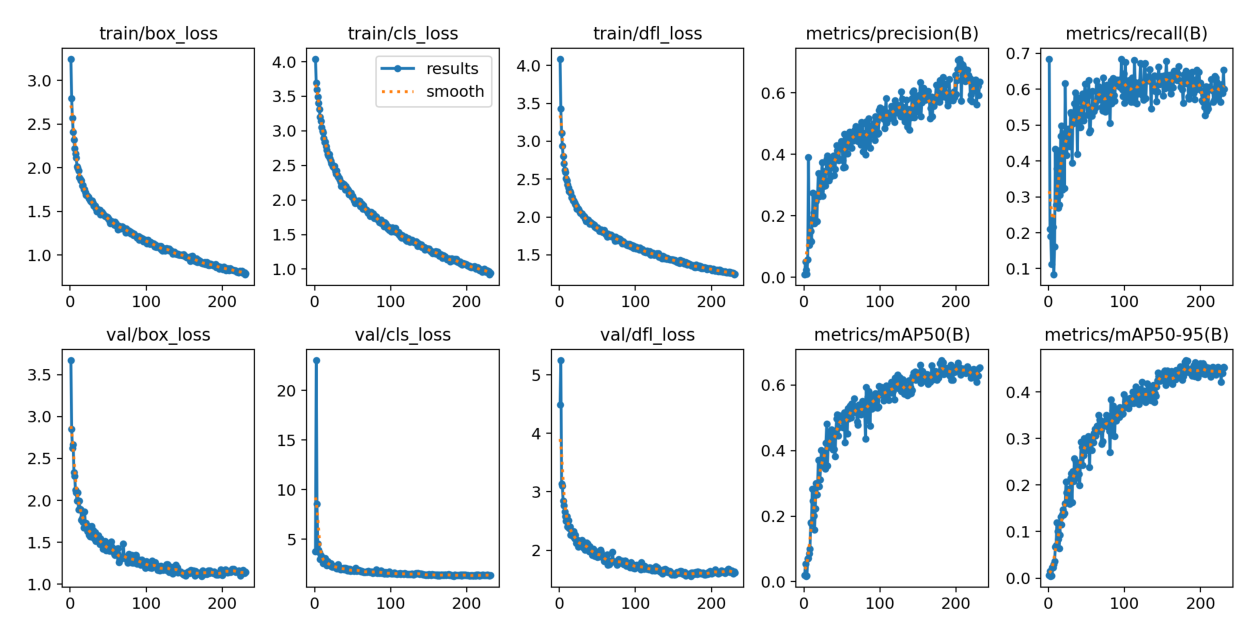

In [34]:
resultados_grafico = cv2.imread(os.path.join(diretorio_resultado, 'results.png'))
mostrar_imagem(resultados_grafico)

In [35]:
dir_resultado_val = 'runs/detect/yolov8s_modelo_eval'

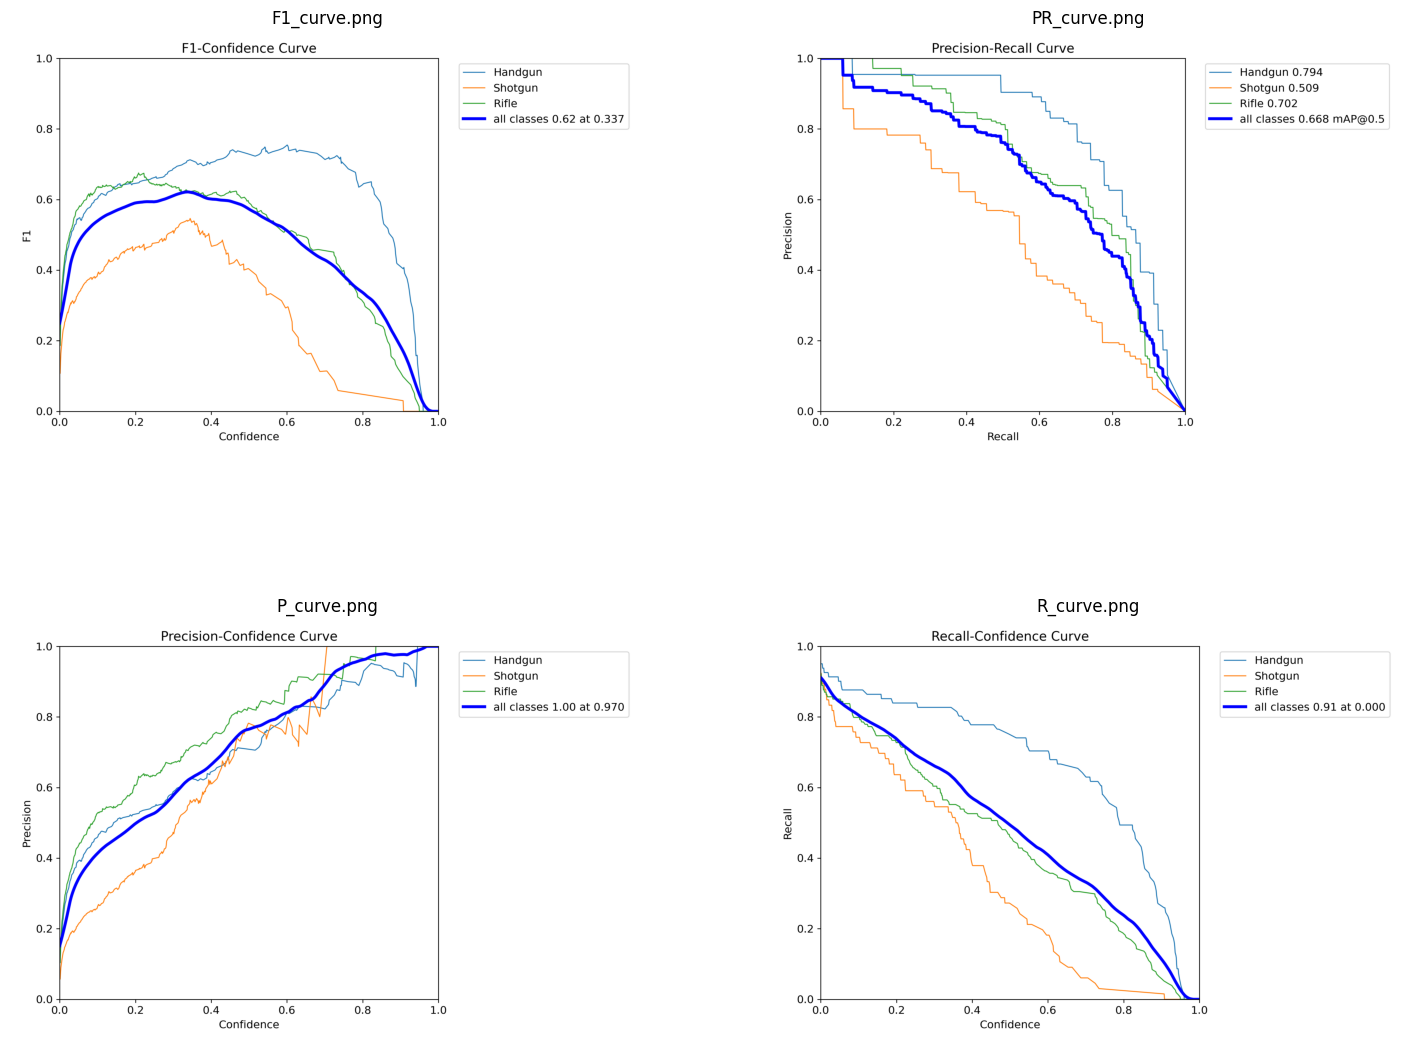

In [36]:
imgs = ['F1_curve.png', 'PR_curve.png', 'P_curve.png', 'R_curve.png']
plt.figure(figsize=(18,14))
for i, img in enumerate(imgs):
  #print(i, img)
  grafico = cv2.imread(os.path.join(dir_resultado_val, img))
  #print(grafico)
  grafico = cv2.cvtColor(grafico, cv2.COLOR_BGR2RGB)
  plt.subplot(2, 2, i + 1)
  plt.title(imgs[i])
  plt.imshow(grafico)
  plt.axis('off')
plt.show()

Vamos fazer a impressão da matriz de confusão para verificar o desempenho do modelo em cada uma das classes

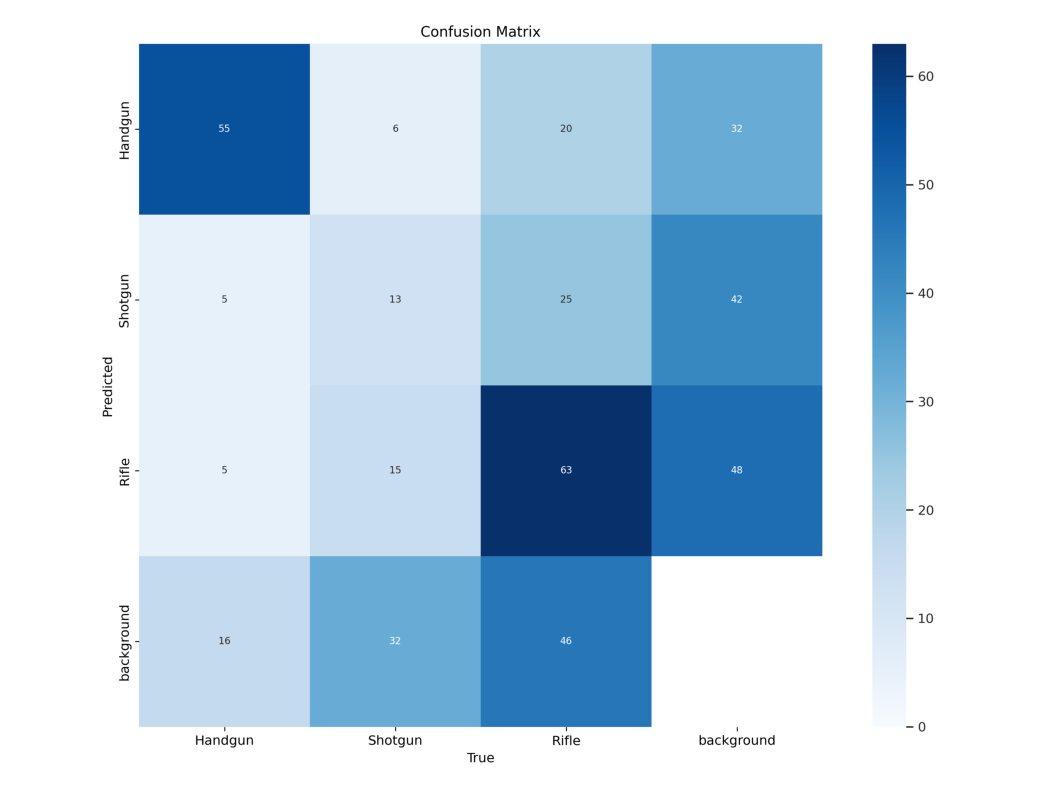

In [38]:
matriz_confusao = cv2.imread(os.path.join(dir_resultado_val, 'confusion_matrix.png'))
mostrar_imagem(matriz_confusao)

Por meio da matriz de confusão é possível ver que a classe que o modelo apresenta o pior desempenho é Shotgun.

Por fim, vamos testar desempenho do modelo com o uso de imagens de teste.

In [39]:
#criando um diretório para alocar as imagnes de teste
!mkdir imagens_teste

In [45]:
#executando o teste na imagem
!yolo task=detect mode=predict model={diretorio_resultado}/weights/best.pt source='/content/dataset/imagens_teste' save=true conf=0.2

Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/dataset/imagens_teste/pexels-koolshooters-8105788.jpg: 640x448 1 Handgun, 78.1ms
Speed: 4.7ms preprocess, 78.1ms inference, 496.5ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


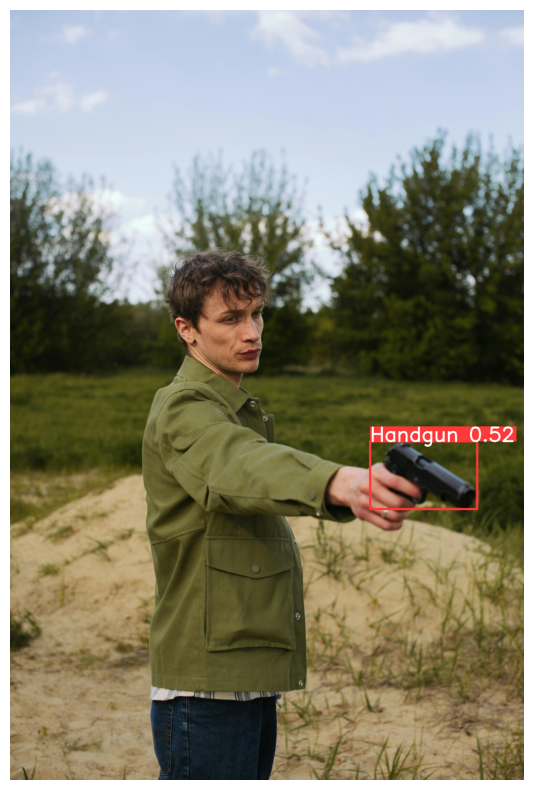

In [48]:
#imprimindo a imagem de teste após a detecção
dir_predicoes = 'runs/detect/predict2/'
caminhos = [os.path.join(dir_predicoes, f) for f in os.listdir(dir_predicoes)]
for caminho_imagem in caminhos:
  imagem = cv2.imread(caminho_imagem)
  mostrar_imagem(imagem)